# Topic Modelling on BBC Sports News Articles

The data is available [link](http://mlg.ucd.ie/files/datasets/bbcsport-fulltext.zip).

In [64]:
# Import required libraries
# Read data
# Explore and pre-process text
# Topic Modeling

## Import required libraries

In [65]:
import numpy as np
import pandas as pd
import nltk
import spacy
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth", 200)

## Read Data

In [66]:
# open the file using open() function
file = open('data/bbc_sports_articles/003.txt', mode='rt', encoding='utf-8')

# read content using .read() function
text = file.read()

# close the file using .close() function
file.close()

In [67]:
text

'Greene sets sights on world title\n\nMaurice Greene aims to wipe out the pain of losing his Olympic 100m title in Athens by winning a fourth World Championship crown this summer.\n\nHe had to settle for bronze in Greece behind fellow American Justin Gatlin and Francis Obikwelu of Portugal. "It really hurts to look at that medal. It was my mistake. I lost because of the things I did," said Greene, who races in Birmingham on Friday. "It\'s never going to happen again. My goal - I\'m going to win the worlds." Greene crossed the line just 0.02 seconds behind Gatlin, who won in 9.87 seconds in one of the closest and fastest sprints of all time. But Greene believes he lost the race and his title in the semi-finals. "In my semi-final race, I should have won the race but I was conserving energy. "That\'s when Francis Obikwelu came up and I took third because I didn\'t know he was there. "I believe that\'s what put me in lane seven in the final and, while I was in lane seven, I couldn\'t feel 

---

In [68]:
# read file names
file_names = os.listdir("data/bbc_sports_articles")

In [69]:
# print first 10 file names
file_names[:10]

['156.txt',
 '167.txt',
 '276.txt',
 '168.txt',
 '023.txt',
 '348.txt',
 '387.txt',
 '247.txt',
 '107.txt',
 '081.txt']

---
Let's read all the articles using a fol loop.

In [70]:
# empty list
articles = []

# read all articles
for f in file_names:
    # open the file
    file = open('data/bbc_sports_articles/'+f, mode='rt', encoding='utf-8')
    text = file.read()
    file.close()
    
    articles.append(text)

In [71]:
len(articles)

471

<br>

## Explore and Pre-process the Text

Let's try to understand the text data we have in the BBC Sports News Articles. This exploration will determine the subsequent sequence of actions to be taken on the text data.

First of all, we will randomly select some articles and inspect them.

In [72]:
articles[54]

"Aussies tighten grip\n\nFirst Test, Perth, day three: Australia 381 & 361-5 dec; Pakistan 179 & 18-1 (close)\n\nThe home side declared their second innings on 361-5, a lead of 563, and Pakistan were 18-1 at the close. Martyn made no mistake after Ricky Ponting was stumped for 98 and Justin Langer bowled by Abdul Razzaq for 97. Left to survive six overs before the close, Pakistan lost Imran Farhat, who was lbw to Glenn McGrath for one. Pakistan's cause was not helped by the absence of skipper Inzamam-ul-Haq and paceman Shoaib Akhtar for most of the afternoon. Inzamam stayed in the dressing room suffering from a stomach upset, while Shoaib hurt his left shoulder while trying to make a diving save in the field.\n\nHe had taken the only wicket to fall during the morning, bowling Matthew Hayden for 10 with an inswinger as Australia advanced their score from 15-0 to 110-1. Langer's fifty arrived off 84 balls and he struck 14 fours as he and Ponting shared a second wicket stand of 163. It lo

---

There are lots __(\\')__ and __(\n)__ which are undesirable. Let's go ahead and get rid of them.

### 1. Text Cleaning

In [73]:
clean_articles = []

# clean the articles and store it in the list clean_articles
for i in articles:
    clean_articles.append(i.replace("\n"," ").replace("\'", " "))

In [74]:
clean_articles[54]

'Aussies tighten grip  First Test, Perth, day three: Australia 381 & 361-5 dec; Pakistan 179 & 18-1 (close)  The home side declared their second innings on 361-5, a lead of 563, and Pakistan were 18-1 at the close. Martyn made no mistake after Ricky Ponting was stumped for 98 and Justin Langer bowled by Abdul Razzaq for 97. Left to survive six overs before the close, Pakistan lost Imran Farhat, who was lbw to Glenn McGrath for one. Pakistan s cause was not helped by the absence of skipper Inzamam-ul-Haq and paceman Shoaib Akhtar for most of the afternoon. Inzamam stayed in the dressing room suffering from a stomach upset, while Shoaib hurt his left shoulder while trying to make a diving save in the field.  He had taken the only wicket to fall during the morning, bowling Matthew Hayden for 10 with an inswinger as Australia advanced their score from 15-0 to 110-1. Langer s fifty arrived off 84 balls and he struck 14 fours as he and Ponting shared a second wicket stand of 163. It looked o

---

Let's remove numbers, punctuation, and special characters (&!>$@$...etc).

In [75]:
# strip everthing except alphabets from the text
clean_articles = [re.sub("[^a-zA-Z]"," ",x) for x in clean_articles]

In [76]:
clean_articles[54]

'Aussies tighten grip  First Test  Perth  day three  Australia             dec  Pakistan             close   The home side declared their second innings on        a lead of      and Pakistan were      at the close  Martyn made no mistake after Ricky Ponting was stumped for    and Justin Langer bowled by Abdul Razzaq for     Left to survive six overs before the close  Pakistan lost Imran Farhat  who was lbw to Glenn McGrath for one  Pakistan s cause was not helped by the absence of skipper Inzamam ul Haq and paceman Shoaib Akhtar for most of the afternoon  Inzamam stayed in the dressing room suffering from a stomach upset  while Shoaib hurt his left shoulder while trying to make a diving save in the field   He had taken the only wicket to fall during the morning  bowling Matthew Hayden for    with an inswinger as Australia advanced their score from      to        Langer s fifty arrived off    balls and he struck    fours as he and Ponting shared a second wicket stand of      It looked o

In [77]:
# remove single character terms
clean_articles = [' '.join([w for w in x.split() if len(w)>1]) for x in clean_articles]

In [78]:
clean_articles[54]

'Aussies tighten grip First Test Perth day three Australia dec Pakistan close The home side declared their second innings on lead of and Pakistan were at the close Martyn made no mistake after Ricky Ponting was stumped for and Justin Langer bowled by Abdul Razzaq for Left to survive six overs before the close Pakistan lost Imran Farhat who was lbw to Glenn McGrath for one Pakistan cause was not helped by the absence of skipper Inzamam ul Haq and paceman Shoaib Akhtar for most of the afternoon Inzamam stayed in the dressing room suffering from stomach upset while Shoaib hurt his left shoulder while trying to make diving save in the field He had taken the only wicket to fall during the morning bowling Matthew Hayden for with an inswinger as Australia advanced their score from to Langer fifty arrived off balls and he struck fours as he and Ponting shared second wicket stand of It looked odds on that he would become the first man ever to make hundred in each innings of Test at the Waca whe

---
We have cleaned our text to a great extent. However, we should now make uppercase characters to lowercase or else it would result in an inflated vocabulary of unique words.

For example, the terms __'But'__ and __'but'__ would be considered as 2 separate words.

In [79]:
clean_articles = [x.lower() for x in clean_articles]

In [80]:
clean_articles[54]

'aussies tighten grip first test perth day three australia dec pakistan close the home side declared their second innings on lead of and pakistan were at the close martyn made no mistake after ricky ponting was stumped for and justin langer bowled by abdul razzaq for left to survive six overs before the close pakistan lost imran farhat who was lbw to glenn mcgrath for one pakistan cause was not helped by the absence of skipper inzamam ul haq and paceman shoaib akhtar for most of the afternoon inzamam stayed in the dressing room suffering from stomach upset while shoaib hurt his left shoulder while trying to make diving save in the field he had taken the only wicket to fall during the morning bowling matthew hayden for with an inswinger as australia advanced their score from to langer fifty arrived off balls and he struck fours as he and ponting shared second wicket stand of it looked odds on that he would become the first man ever to make hundred in each innings of test at the waca whe

---
Now we will check the most frequent words appearing in the articles.

In [81]:
# function to plot top 30 most frequent words
def freq_words(x, terms = 30):
  # combine all the articles  
  text = ' '.join([text for text in x])
  # split text into words   
  all_words = text.split()
  
  # prepare a dictionary of word-frequency pairs
  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  
  # plot the word counts  
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

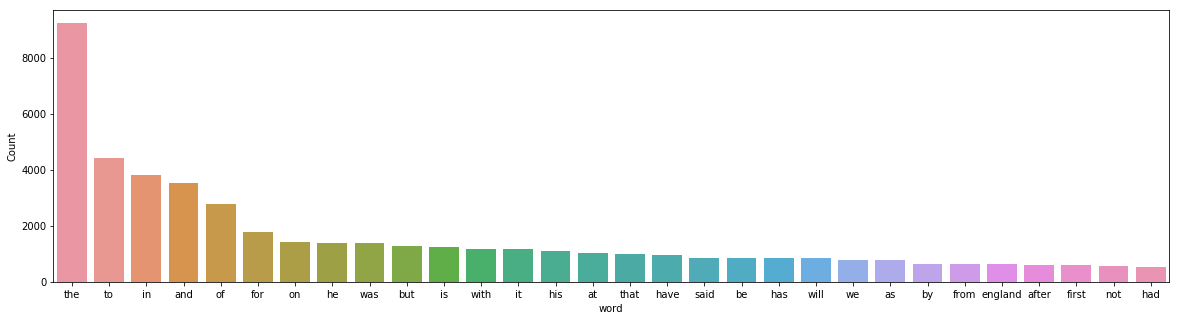

In [82]:
freq_words(clean_articles)

Words like 'the', 'and', 'for', 'on' etc. are in large numbers and they don't really tell us anything about any topic or idea. Hence, we should take off these sort of words and let the more important words come up.

### 2. Lemmatize Text and Strip Stopwords

In [83]:
# load spaCy model
nlp = spacy.load('en_core_web_sm')

In [84]:
# lemmatization
clean_articles = [' '.join([token.lemma_ for token in nlp(x)]) for x in clean_articles]

# remove stopwords
clean_articles = [' '.join([w for w in x.split() if nlp.vocab[w].is_stop==False]) for x in clean_articles]

In [85]:
clean_articles[54]

'aussie tighten grip test perth day australia dec pakistan close home declare -PRON- second innings lead pakistan close martyn mistake ricky ponting stump justin langer bowl abdul razzaq leave survive close pakistan lose imran farhat lbw glenn mcgrath pakistan help absence skipper inzamam ul haq paceman shoaib akhtar afternoon inzamam stay dressing room suffer stomach upset shoaib hurt -PRON- left shoulder try diving save field -PRON- wicket fall morning bowling matthew hayden inswinger australia advance -PRON- score langer arrive ball -PRON- strike -PRON- pont share second wicket stand -PRON- look odd -PRON- man innings test waca razzaq find way -PRON- attempt drive langer innings high run scorer test include century pont tea interval set reach figure time year -PRON- deny -PRON- miss attempt sweep danish kaneria keeper kamran akmal whip bail dismissal confirm tv umpire darren lehmann bowl kaneria michael clarke join martyn stand fifth wicket -PRON- catch revive inzamam mohammad sami 

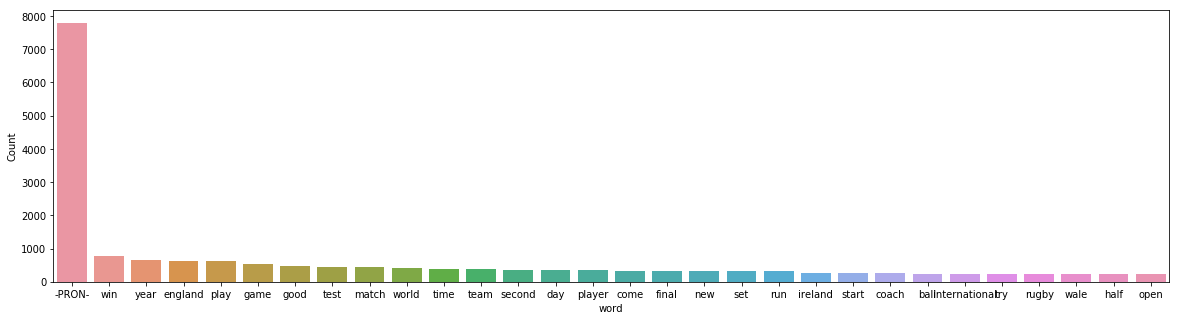

In [84]:
freq_words(clean_articles)

Most of the stopwords have been removed. However, quite a many pronouns have been replaced with the tag __-PRON-__. This is a technical issue with spaCy. We will have to manually remove it.

In [86]:
# remove -PRON- tags
clean_articles = [re.sub('-PRON-',  '', i) for i in clean_articles]

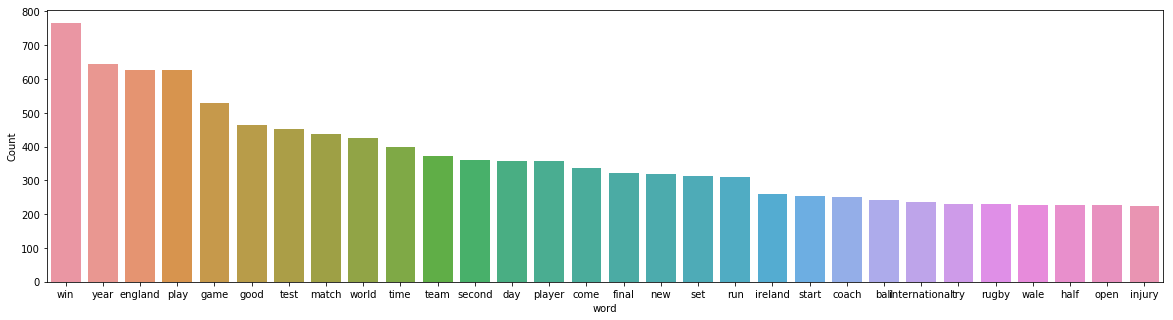

In [86]:
freq_words(clean_articles)

<br>

## Topic Modeling

__Document-Term-Matrix__

<img src="table.png">

In [87]:
def get_words(x):
  # combine all the articles  
  text = ' '.join([text for text in x])
  # split text into words   
  return set(text.split())

In [88]:
# get unique words in the articles
unique_words = get_words(clean_articles)

# count of unique words
len(unique_words)

7584

This is the first step towards topic modeling. We will use sklearn's TfidfVectorizer to create a document-term matrix with 1000 terms.

__1. Vectorization__

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
vectorizer = TfidfVectorizer()
    
X = vectorizer.fit_transform(clean_articles)

X.shape

(471, 7584)

In [91]:
X_df = pd.SparseDataFrame(X, columns=vectorizer.get_feature_names(), index=range(len(clean_articles)), default_fill_value=0)

In [92]:
X_df.iloc[:10,1000:1020]

,carefully,caretaker,carl,carlisle,carlo,carlsen,carolina,carr,carrier,carroll,carry,carter,cartilage,carve,carwyn,cas,case,casey,cash,casson
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075926,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.027865,0.000000,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.141653,0.091388,0.0,0.0,0.0


In [94]:
vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(max_features= 1000, # keep top 1000 most important terms 
                             min_df= 5,
                             max_df = 0.9)
    
X = vectorizer.fit_transform(clean_articles)

X.shape # check shape of the document-term matrix

(471, 1000)

__2. Dimensionality Reduction__

The next step is to represent each and every term and document as a vector.  
* Specify the number of topics.
* Decompose the document-term matrix into 2 matrix.
    1. Document-Topic Matrix
    2. Topic-Term Matrix
  
  ![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/Screenshot_7.png)
  
* Use sklearn's TruncatedSVD to perform the task of matrix decomposition. 

In [111]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=4, random_state=12, n_iter=100)

In [112]:
svd_model.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=100,
       random_state=12, tol=0.0)

The components of svd_model are our topics and we can access them using svdmodel.components. Finally let's print a few most important words in each of the 4 topics and see how good our model is.

In [113]:
# get column names of document term matrix
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
    
    print("Topic "+str(i)+": ")
    topics = []
    for t in sorted_terms:
        topics.append(t[0])
    
    print(topics)
    print('\n')

Topic 0: 
['england', 'win', 'play', 'year', 'game', 'good', 'test', 'match', 'world', 'player', 'team', 'wale', 'ireland', 'final', 'time', 'day', 'cricket', 'new', 'rugby', 'second', 'come', 'france', 'set', 'run', 'open', 'injury', 'coach', 'cup', 'think', 'tour', 'half', 'australia', 'south', 'nation', 'start', 'international', 'series', 'victory', 'champion', 'beat', 'try', 'week', 'captain', 'great', 'robinson', 'season', 'william', 'ball', 'lose', 've']


Topic 1: 
['olympic', 'indoor', 'champion', 'win', 'seed', 'world', 'title', 'race', 'open', 'final', 'set', 'european', 'year', 'holme', 'roddick', 'woman', 'federer', 'event', 'championship', 'athen', 'compete', 'round', 'record', 'britain', 'birmingham', 'athlete', 'hewitt', 'gold', 'break', 'grand', 'beat', 'american', 'jump', 'british', 'medal', 'agassi', 'australian', 'athletic', 'second', 'davenport', 'marathon', 'double', 'madrid', 'tennis', 'old', 'cross', 'russian', 'henman', 'wimbledon', 'safin']


Topic 2: 
['englan

## Article Categorization

In [114]:
lsa_topic_matrix = svd_model.transform(X)
lsa_topic_matrix.shape

(471, 4)

In [115]:
lsa_topic_matrix[41]

array([ 0.36980917,  0.18453593,  0.01711294, -0.19797186])

In [129]:
articles[9]

'IAAF will contest Greek decision\n\nThe International Association of Athletics Federations will appeal against the acquittal of Greek athletes Kostas Kenteris and Katerina Thanou.\n\nThe high-profile duo were cleared of doping offences by the Greek Athletics Federation (Segas) last month. Now the IAAF will lodge an appeal with the Court of Arbitration for Sport (CAS) and has suspended both athletes. An IAAF statement said: "The Doping Review Board concluded that the decision is erroneous." The statement continued: "Both athletes\' cases will be refered to arbitration before the CAS. The decision in both cases will be final and binding."\n\nSegas said the IAAF appeal was "expected" and "understandable." "Now we are going to await the final result, which we cannot prejudge," said Segas chairman Vassilis Sevastis. Kenteris, who won Olympic 200m gold at the 2000 Olympics, and Thanou were suspended by the IAAF last December after failing to take routine drugs tests before the Athens Games.

In [130]:
np.argmax(lsa_topic_matrix[9])

3

In [131]:
articles[10]

"Bangladesh build platform\n\nFirst Test, Chittagong, day two (stumps): Bangladesh 488 v Zimbabwe 84-4\n\nThey began by extending their overnight 280-4 by 208 in just over two sessions, for their highest Test total of 488. Rajin Saleh led the way with 89 and Mohammad Rafique hit four sixes in his 69, sharing stands of 69 and 62 with Khaled Mashud and Mashrafe bin Mortaza. Zimbabwe then lost four wickets inside 21 overs before a slight recovery. The home side had only passed 400 twice previously in 34 Tests, scoring 400 against India in their inaugural match in 2000 and 416 in the West Indies last year. They suffered an early setback when Aftab Ahmed was lbw to Christopher Mpofu for six in the third over of play.\n\nBut Saleh, who was 60 not out overnight, progressed to his best score in Tests before departing with the total on 341. Mashud's innings was sedate in tempo, taking up 120 balls and featuring only six boundaries, and he was denied a half century when he became 18-year-old Gra

In [132]:
np.argmax(lsa_topic_matrix[10])

0

## Challenge

Use Latent Dirichlet Allocation (LDA) to build a topic model on the same dataset and compare its results with the above topics.

In [ ]:
# your code here
